Perform K-Means,Hierarchical and DBSCAN Clustering for the crime_data.csv data and 
identify the number of clusters formed and Visualise the results.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

In [166]:
df = pd.read_csv("crime_data.csv")
df.head(3)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0


In [167]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [168]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [169]:
df.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [170]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [171]:
scaled_df= scaler.transform(df)
scaled_df = pd.DataFrame(scaled_df, columns = ['Murder', 'Assault', 'UrbanPop', 'Rape'] )
scaled_df.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


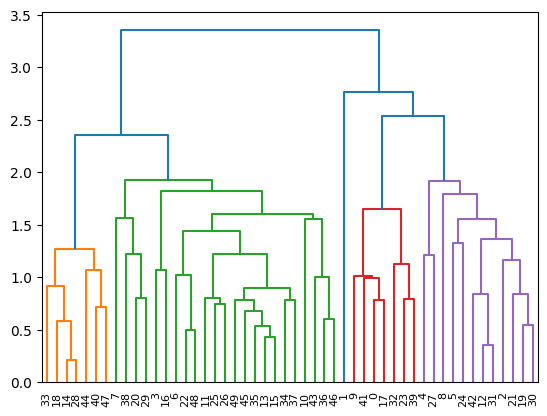

In [172]:
from scipy.cluster import hierarchy
linkage = hierarchy.linkage(scaled_df, method="average")
dendrogram = hierarchy.dendrogram(linkage)

In [173]:
clusters = 3
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=clusters)
kmeans.fit(scaled_df)

KMeans(n_clusters=3)

In [174]:
kmeans.labels_

array([1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

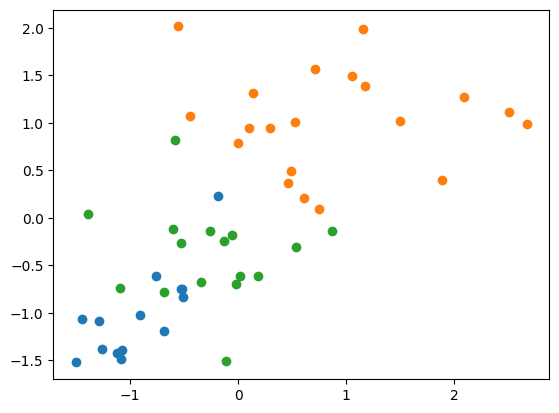

In [175]:
for cluster in range(clusters):
    plt.scatter(
        scaled_df['Rape'][kmeans.labels_ == cluster], 
        scaled_df['Assault'][kmeans.labels_ == cluster], 
               )

In [148]:
# collect wss for all the clusters
wss = []

for cluster in range(1, 10):
    # create kmeans with number of clsuters
    kmeans = KMeans(n_clusters=cluster, random_state=123456)

    # fit the data
    kmeans.fit(df)

    # collect the sum of squares
    wss.append(kmeans.inertia_)

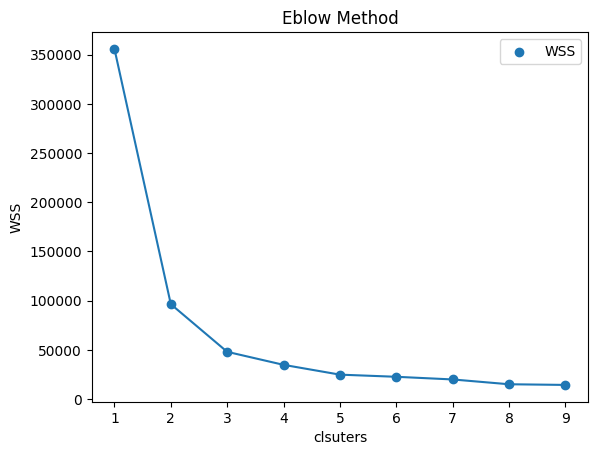

In [149]:
# create the number of clusters
clusters = np.arange(1, 10)

# create the eblow chart
plt.scatter(clusters, wss, label="WSS")
plt.plot(clusters, wss)


plt.xlabel("clsuters")
plt.ylabel("WSS")
plt.title("Eblow Method")
plt.legend()

In [162]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=4)
dbscan.fit(scaled_df)

DBSCAN(eps=0.8, min_samples=4)

In [163]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0, -1,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1,  0,  0],
      dtype=int64)

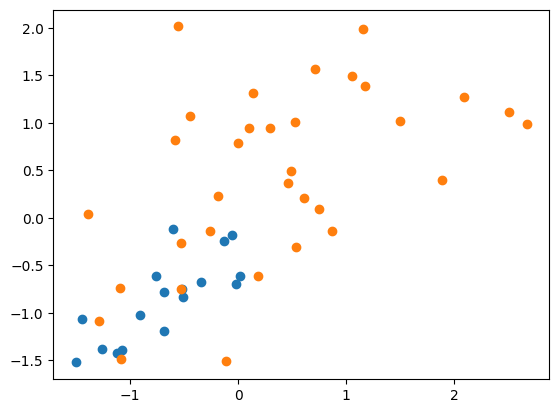

In [164]:
plt.scatter(scaled_df['Rape'][dbscan.labels_ == 0], scaled_df['Assault'][dbscan.labels_ == 0])
plt.scatter(scaled_df['Rape'][dbscan.labels_ == -1], scaled_df['Assault'][dbscan.labels_ == -1])